<a href="https://colab.research.google.com/github/rkpassin132/Learn-Python/blob/main/Assignment_03_Advance_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part I: Process Automation

#### Q1. Create a file that contains 1000 lines of random strings

In [ ]:
import random as r
import string

letters = string.ascii_letters
fp = open("question1.txt", "w")
for i in range(0,1000):
  fp.write(''.join(r.sample(letters, 10))+"\n")
fp.close()
print("file created !")  


file writing is done !


#### Q2. Create a file that contains multiple lines of random strings and file size must be 5 MB

In [ ]:
oneMB = 1024 * 1024
def createFile(file, sizeLimit=11):
  fp = open(file, "w")
  for i in range(0, int(sizeLimit/11)):
    fp.write(''.join(r.sample(letters, 10))+"\n")
  fp.close()

createFile("question2.txt", oneMB * 5)  
print("file created !")

file created !


#### Q3. Create 10 files that contains multiple lines of random strings and file size of each file must be 5 MB.

In [ ]:
import os

def makeDir(dir):
  try:
    os.mkdir(dir)
  except:
    pass

makeDir("question3")
for i in range(1,11):
  createFile(f"question3/file{i}.txt", oneMB * 5)
print("10 files created !")  

10 files created !


#### Q4. Create 5 files of size 1GB, 2GB, 3GB, 4GB and 5GB; file contains multiple lines of random strings.

In [ ]:
makeDir("question4")
createFile("question4/1gb.txt", oneMB * 1024 * 1)
createFile("question4/2gb.txt", oneMB * 1024 * 2)
createFile("question4/3gb.txt", oneMB * 1024 * 3)
createFile("question4/4gb.txt", oneMB * 1024 * 4)
createFile("question4/5gb.txt", oneMB * 1024 * 5)
print("Files created !")

#### Q5. Convert all the files of Q4 into upper case one by one.

In [ ]:
def fileToUpper(file):
  with open(file, 'r') as inp:
      y = inp.read().upper()
  with open(file, 'w') as out:
      out.write(y)

fileToUpper("question4/1gb.txt")
fileToUpper("question4/2gb.txt")
fileToUpper("question4/3gb.txt")
fileToUpper("question4/4gb.txt")
fileToUpper("question4/5gb.txt")
print("File is updated !")

File is updated !


#### Q6. Convert all the files of Q4 into upper case parallel using **multi-threading**

In [ ]:
import threading

# create thread
t1 = threading.Thread(fileToUpper("question4/1gb.txt"), name="1gb")
t2 = threading.Thread(fileToUpper("question4/2gb.txt"), name="2gb")
t3 = threading.Thread(fileToUpper("question4/3gb.txt"), name="3gb")
t4 = threading.Thread(fileToUpper("question4/4gb.txt"), name="4gb")
t5 = threading.Thread(fileToUpper("question4/5gb.txt"), name="5gb")

# starting threads
t1.start()
t2.start()
t3.start()
t4.start()
t5.start()

# wait until all threads finish
t1.join()
t2.join()
t3.join()
t4.join()
t5.join()

print("File is updated !")

#### Q7. WAP to automatically download 10 images of cat from “Google Images”. [*Hint: Find the package from pypi.org and use it*]

In [ ]:
!pip install urllib2 simplejson cStringIO

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement urllib2 (from versions: none)
ERROR: No matching distribution found for urllib2


In [ ]:
import urllib2
import simplejson
import cStringIO

fetcher = urllib2.build_opener()
searchTerm = 'parrot'
startIndex = 0
searchUrl = "http://ajax.googleapis.com/ajax/services/search/images?v=1.0&q=" + searchTerm + "&start=" + startIndex
f = fetcher.open(searchUrl)
deserialized_output = simplejson.load(f)
print(deserialized_output)

#### Q8. WAP to automatically download 10 videos of “Machine Learning” from “Youtube.com”. [*Hint: Find the package from pypi.org and use it*]


In [ ]:
!pip install pytube

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 7.6 MB/s eta 0:00:00


In [ ]:
from pytube import YouTube
import os


def DownloadComplete(stream, path):
  if os.path.isdir("question8") == False : os.mkdir("question8") 
  newpath = f"/content/question8/{path.replace('/content/', '')}"
  os.rename(path, newpath)
  print(f"Downloaded path: '{newpath}' \n")


def DownloadProgress(stream, chunk, data):
  print(f"Remain downloading... {int(data/(1024*1024))} Mb")

def downloadYouTubeVideo(link):
  try:
    # object creation using YouTube
    yt = YouTube(link, on_progress_callback=DownloadProgress, on_complete_callback=DownloadComplete  )
    print(f"Downloading... '{link}'video")
    yt.streams.filter(progressive=True, file_extension='mp4').order_by('resolution').desc().first().download()
  except Exception as error:
    print("Downloading error..", error)


In [ ]:
#link of the video to be downloaded
links=["https://www.youtube.com/watch?v=orbkg5JH9C8", "https://www.youtube.com/watch?v=8sLS2knUa6Y"]  
for link in links: 
  downloadYouTubeVideo(link)  
print('Task Completed!')

Downloading... 'https://www.youtube.com/watch?v=orbkg5JH9C8'video
Remain downloading... 0 Mb
Downloaded path: '/content/question8/Kandima Signature Video - 20 seconds.mp4' 

Downloading... 'https://www.youtube.com/watch?v=8sLS2knUa6Y'video
Remain downloading... 15 Mb
Remain downloading... 6 Mb
Remain downloading... 0 Mb
Downloaded path: '/content/question8/Phir Aur Kya Chahiye.mp4' 

Task Completed!


#### Q9. Convert all the videos of Q8 and convert it to audio. [*Hint: Find the package from pypi.org and use it*]

In [ ]:
!pip install moviepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import moviepy.editor as mp

def VideoToAudio(video, audio):
  try:
    print(f"Converting '{video}'")
    # Insert Local Video File Path
    clip = mp.VideoFileClip(video)
    
    # Insert Local Audio File Path
    clip.audio.write_audiofile(audio)
    print("Coversion done !\n")
  except Exception as error:
    print("Error : ", error)

In [ ]:
videos = os.listdir('question8')
if os.path.isdir("question8/audio") == False : os.mkdir("question8/audio") 
for video in videos:
  VideoToAudio(f"question8/{video}", f"question8/audio/{video.replace('.mp4','')}.mp3")


Converting 'question8/Kandima Signature Video - 20 seconds.mp4'
MoviePy - Writing audio in question8/audio/Kandima Signature Video - 20 seconds.mp3


MoviePy - Done.
Coversion done !

Converting 'question8/audio'
Error :  MoviePy error: failed to read the duration of file question8/audio.
Here are the file infos returned by ffmpeg:

ffmpeg version 4.2.2-static https://johnvansickle.com/ffmpeg/  Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 8 (Debian 8.3.0-6)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-debug --disable-ffplay --disable-indev=sndio --disable-outdev=sndio --cc=gcc --enable-fontconfig --enable-frei0r --enable-gnutls --enable-gmp --enable-libgme --enable-gray --enable-libaom --enable-libfribidi --enable-libass --enable-libvmaf --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-librubberband --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libvorbis --enable-libopus --enable-libtheora --enable-libvidstab --enable-libvo-amrwbenc --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265

MoviePy - Done.
Coversion done !



#### Q10. Create an automated pipeline using multi-threading for:
```“Automatic Download of 100 Videos from YouTube” → “Convert it to Audio”```


In [ ]:
# Overriding about DownloadComplete function to add VideoToAudio function
def DownloadComplete(stream, path):
  if os.path.isdir("question10") == False : os.mkdir("question10") 
  fileName = path.replace('/content/', '')
  newpath = f"/content/question10/{fileName}"
  os.rename(path, newpath)
  print(f"Downloaded path: '{newpath}' \n")
  # convert video to audio
  if os.path.isdir("question10/audio") == False : os.mkdir("question10/audio")  
  VideoToAudio(newpath, f"/content/question10/audio/{fileName.replace('mp4', '')}.mp3")


import concurrent.futures
links =["https://www.youtube.com/watch?v=orbkg5JH9C8", "https://www.youtube.com/watch?v=8sLS2knUa6Y"]  

# create a thread pool with 2 threads
pool = concurrent.futures.ThreadPoolExecutor(max_workers=2)
for link in links:
   pool.submit(downloadYouTubeVideo, link)

# wait for all tasks to complete
pool.shutdown(wait=True)
print("\nDone : “Automatic Download of 100 Videos from YouTube” → “Convert it to Audio”")

Downloading... 'https://www.youtube.com/watch?v=orbkg5JH9C8'videoDownloading... 'https://www.youtube.com/watch?v=8sLS2knUa6Y'video

Remain downloading... 0 Mb
Downloaded path: '/content/question10/Kandima Signature Video - 20 seconds.mp4' 

Converting '/content/question10/Kandima Signature Video - 20 seconds.mp4'
Remain downloading... 15 Mb
MoviePy - Writing audio in /content/question10/audio/Kandima Signature Video - 20 seconds..mp3
Remain downloading... 6 Mb

chunk:   0%|          | 0/442 [00:00<?, ?it/s, now=None]


Remain downloading... 0 Mb
Downloaded path: '/content/question10/Phir Aur Kya Chahiye.mp4' 

Converting '/content/question10/Phir Aur Kya Chahiye.mp4'


chunk:  22%|██▏       | 97/442 [00:00<00:00, 533.36it/s, now=None]

MoviePy - Writing audio in /content/question10/audio/Phir Aur Kya Chahiye..mp3



chunk:  94%|█████████▍| 417/442 [00:01<00:00, 365.82it/s, now=None]
                                                                   

chunk:   8%|▊         | 374/4747 [00:01<00:15, 274.27it/s, now=None]

MoviePy - Done.
Coversion done !




chunk: 100%|█████████▉| 4736/4747 [00:07<00:00, 855.61it/s, now=None]
                                                                     

MoviePy - Done.
Coversion done !


Done : “Automatic Download of 100 Videos from YouTube” → “Convert it to Audio”


#### Q11. Create an automated pipeline using multi-threading for: Automatic Download of 500 images of Dog from
`GoogleImages” → “Rescale it to 50%”`

In [ ]:
# 

---
# Part II: Data Analytics

#### Q12. Create a random dataset of 100 rows and 30 columns. All the values are defined between [1,200]. Perform the following operations:

```
1. Replace all the values with NA in the dataset defined between [10, 60]. Print the count of number rows having missing values.
2. Replace all the NA values with the average of the column value.
3. Find the Pearson correlation among all the columns and plot heat map. Also select those columns having correlation <=0.7.
4. Normalize all the values in the dataset between 0 and 10.
5. Replace all the values in the dataset with 1 if value <=0.5 else with 0.

```

In [3]:
import pandas as pd 
import numpy as np
import random as r
import string

In [4]:
df = pd.DataFrame([[r.randint(1, 200) for x in range(30)] for i in range(100)])
df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,100,128,179,69,144,77,123,14,35,195,...,18,56,159,156,112,44,96,27,165,106
1,189,15,174,105,75,181,102,111,9,33,...,177,182,197,157,186,22,82,101,137,103
2,167,104,24,178,184,131,148,65,156,152,...,199,10,169,186,101,35,137,121,91,105
3,88,71,165,166,163,60,1,124,38,173,...,61,145,22,185,159,128,61,28,54,68
4,5,73,36,190,194,1,129,138,97,21,...,17,96,84,8,140,61,108,58,189,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,67,82,199,154,115,15,49,168,15,43,...,59,38,114,183,110,129,95,132,70,133
96,41,58,80,108,23,158,72,112,61,102,...,47,80,187,101,2,196,145,123,114,180
97,177,53,120,49,189,169,95,32,172,199,...,1,30,180,144,7,146,193,195,143,123
98,185,74,99,148,27,67,99,171,39,40,...,141,30,74,14,18,176,10,87,27,162


In [5]:
# 1. Replace all the values with NA in the dataset defined between [10, 60]. 
df2 = df.replace(to_replace=list(range(10,60)), value=np.nan)
df2
# Print the count of number rows having missing values.
sum(df2.apply(lambda x: sum(x.isnull().values), axis = 1)>0)

100

In [6]:
# 2. Replace all the NA values with the average of the column value.
print(df2.head())
for i in df2.columns[df2.isnull().any(axis=0)]:     #---Applying Only on variables with NaN values
    df2[i].fillna(df2[i].mean(),inplace=True)
df2.head()

      0      1      2      3      4      5      6      7      8      9   ...  \
0  100.0  128.0  179.0   69.0  144.0   77.0  123.0    NaN    NaN  195.0  ...   
1  189.0    NaN  174.0  105.0   75.0  181.0  102.0  111.0    9.0    NaN  ...   
2  167.0  104.0    NaN  178.0  184.0  131.0  148.0   65.0  156.0  152.0  ...   
3   88.0   71.0  165.0  166.0  163.0   60.0    1.0  124.0    NaN  173.0  ...   
4    5.0   73.0    NaN  190.0  194.0    1.0  129.0  138.0   97.0    NaN  ...   

      20     21     22     23     24     25     26     27     28     29  
0    NaN    NaN  159.0  156.0  112.0    NaN   96.0    NaN  165.0  106.0  
1  177.0  182.0  197.0  157.0  186.0    NaN   82.0  101.0  137.0  103.0  
2  199.0    NaN  169.0  186.0  101.0    NaN  137.0  121.0   91.0  105.0  
3   61.0  145.0    NaN  185.0  159.0  128.0   61.0    NaN    NaN   68.0  
4    NaN   96.0   84.0    8.0  140.0   61.0  108.0    NaN  189.0    NaN  

[5 rows x 30 columns]


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,100.0,128.000000,179.000000,69.0,144.0,77.0,123.0,123.974359,123.802632,195.000000,...,117.465753,117.905405,159.000000,156.0,112.0,119.945205,96.0,117.164384,165.00000,106.000000
1,189.0,122.071429,174.000000,105.0,75.0,181.0,102.0,111.000000,9.000000,128.329114,...,177.000000,182.000000,197.000000,157.0,186.0,119.945205,82.0,101.000000,137.00000,103.000000
2,167.0,104.000000,125.802632,178.0,184.0,131.0,148.0,65.000000,156.000000,152.000000,...,199.000000,117.905405,169.000000,186.0,101.0,119.945205,137.0,121.000000,91.00000,105.000000
3,88.0,71.000000,165.000000,166.0,163.0,60.0,1.0,124.000000,123.802632,173.000000,...,61.000000,145.000000,122.293333,185.0,159.0,128.000000,61.0,117.164384,112.69863,68.000000
4,5.0,73.000000,125.802632,190.0,194.0,1.0,129.0,138.000000,97.000000,128.329114,...,117.465753,96.000000,84.000000,8.0,140.0,61.000000,108.0,117.164384,189.00000,119.173333


         0         1         2         3         4         5         6   \
0  1.000000 -0.004811 -0.038234  0.217716 -0.097281  0.129138 -0.015730   
1 -0.004811  1.000000 -0.088086 -0.011986 -0.074472  0.058227  0.149873   
2 -0.038234 -0.088086  1.000000 -0.063183  0.011743  0.079372 -0.195027   
3  0.217716 -0.011986 -0.063183  1.000000  0.269715 -0.065558 -0.005793   
4 -0.097281 -0.074472  0.011743  0.269715  1.000000 -0.129872 -0.151981   

         7         8         9   ...        20        21        22        23  \
0 -0.071392  0.157272  0.128075  ... -0.076232  0.207079  0.122913  0.114046   
1 -0.066730 -0.079247 -0.036702  ...  0.042837 -0.023815  0.124887  0.067938   
2 -0.080509 -0.160268 -0.011914  ... -0.021318  0.006865 -0.041720  0.002331   
3  0.085739 -0.013001  0.017464  ... -0.118203  0.156746  0.035903 -0.118015   
4  0.073465  0.053731 -0.073854  ...  0.043806  0.051524  0.134686  0.118133   

         24        25        26        27        28        29  
0 -0

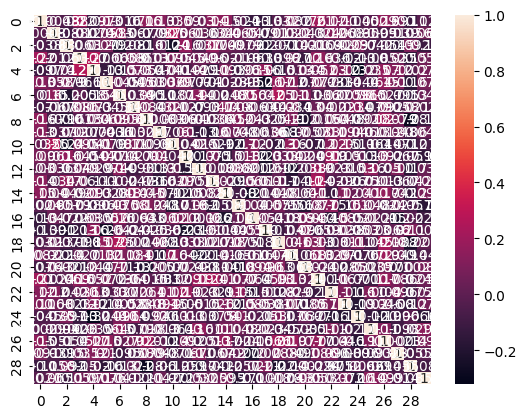

In [7]:
# 3. Find the Pearson correlation among all the columns and plot heat map. Also select those columns having correlation <=0.7.
import matplotlib.pyplot as mp
import seaborn as sb

# Pearson correlation among all the columns
print(df2.corr().head())

# plotting correlation heatmap
dataplot = sb.heatmap(df2.corr(), annot=True)

# displaying heatmap
mp.show()

In [9]:
#  Normalize all the values in the dataset between 0 and 10.
df3 = (df - np.min(df)) / (np.max(df) - np.min(df)) * 10
df3.head()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,4.871795,6.381910,8.974359,3.417085,7.157360,3.819095,6.130653,0.606061,1.708543,9.746193,...,0.858586,2.763819,8.041237,7.788945,5.583756,2.153846,4.720812,1.340206,8.241206,5.252525
1,9.435897,0.703518,8.717949,5.226131,3.654822,9.045226,5.075377,5.505051,0.402010,1.522843,...,8.888889,9.095477,10.000000,7.839196,9.340102,1.025641,4.010152,5.154639,6.834171,5.101010
2,8.307692,5.175879,1.025641,8.894472,9.187817,6.532663,7.386935,3.181818,7.788945,7.563452,...,10.000000,0.452261,8.556701,9.296482,5.025381,1.692308,6.802030,6.185567,4.522613,5.202020
3,4.256410,3.517588,8.256410,8.291457,8.121827,2.964824,0.000000,6.161616,1.859296,8.629442,...,3.030303,7.236181,0.979381,9.246231,7.969543,6.461538,2.944162,1.391753,2.663317,3.333333
4,0.000000,3.618090,1.641026,9.497487,9.695431,0.000000,6.432161,6.868687,4.824121,0.913706,...,0.808081,4.773869,4.175258,0.351759,7.005076,3.025641,5.329949,2.938144,9.447236,0.909091


In [10]:
# Replace all the values in the dataset with 1 if value <=0.5 else with 0.
df3.where(df<=0.5, 1, inplace=True)
df3.where(df>0.5, 0, inplace=True)
df3.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


#### Q13. Create a random dataset of 500 rows and 10 columns.
```
* Columns 1 to 4 are defined between [-10, 10];
* Columns 5 to 8 are defined between [10, 20];
* Columns 9 to 10 are defined between [-100, 100].
```
Apply following clustering algorithms; determine the optimal number of clusters and plot distance metric
graph using each algorithm.
```
1. K-Mean clustering
2. Hierarchical clustering
```


In [13]:
def generateData(x):
  if(x >= 1 and x <= 4): return r.randint(-10, 10) 
  elif(x >= 5 and x <= 8): return r.randint(10, 20)
  else: return r.randint(-100, 100)

df = pd.DataFrame([[ generateData(x)  for x in range(1,11)] for i in range(500)])
print(df.shape)
df.head()

(500, 10)


,0,1,2,3,4,5,6,7,8,9
0,-10,1,-5,9,10,18,13,17,26,32
1,1,-3,-7,-1,12,16,12,11,-22,-90
2,8,10,-8,-3,18,12,19,19,82,95
3,0,6,-1,0,13,10,15,18,54,-37
4,-10,3,-9,-7,14,12,15,12,92,32


#### Q14. Create a random dataset of 600 rows and 15 columns. All the values are defined between [-100,100]. Perform the following operations:
```
1. Plot scatter graph between Column 5 and Column 6.
2. Plot histogram of each column in single graph.
3. Plot the Box plot of each column in single graph.
```

In [31]:
import string

df = pd.DataFrame([[ r.randint(-100, 100) for x in range(0,16)] for i in range(600)], columns=list(string.ascii_lowercase[0:16]))
print(df.shape)
df.head()

(600, 16)


,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p
0,-71,92,-79,-40,24,-21,-85,-76,44,-4,44,-26,18,82,73,86
1,36,-77,-75,-99,-10,-32,23,32,69,41,-89,-45,100,-54,34,-41
2,14,-98,-79,-92,53,42,-99,85,11,-29,78,41,-58,-10,24,-62
3,68,57,61,-100,44,-85,91,-95,-48,-32,49,-1,-43,-10,-36,-34
4,-91,-54,19,73,47,-62,-73,63,64,54,53,-24,-85,2,37,25


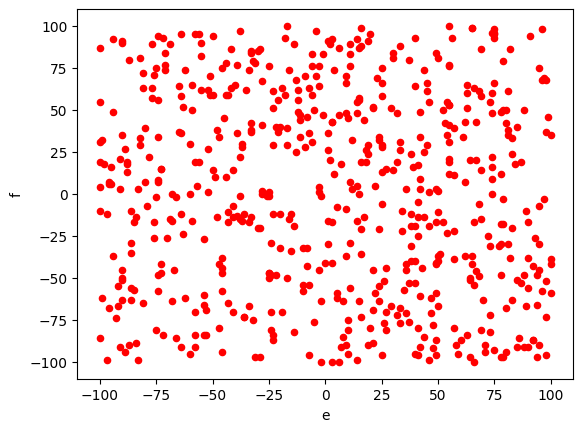

In [32]:
# 1. Plot scatter graph between Column 5 and Column 6.
ax1 = df.plot(kind='scatter', x='e', y='f', color='r')   

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>,
        <Axes: title={'center': 'c'}>, <Axes: title={'center': 'd'}>],
       [<Axes: title={'center': 'e'}>, <Axes: title={'center': 'f'}>,
        <Axes: title={'center': 'g'}>, <Axes: title={'center': 'h'}>],
       [<Axes: title={'center': 'i'}>, <Axes: title={'center': 'j'}>,
        <Axes: title={'center': 'k'}>, <Axes: title={'center': 'l'}>],
       [<Axes: title={'center': 'm'}>, <Axes: title={'center': 'n'}>,
        <Axes: title={'center': 'o'}>, <Axes: title={'center': 'p'}>]],
      dtype=object)

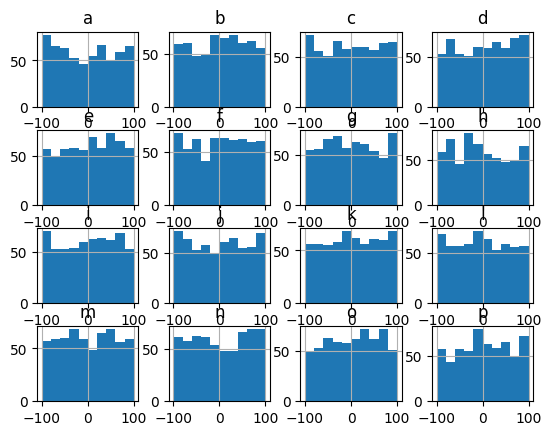

In [33]:
# 2. Plot histogram of each column in single graph.
df.hist()

<Axes: >

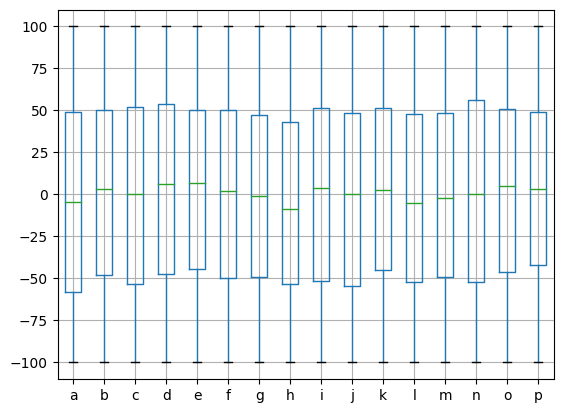

In [35]:
df.boxplot()

#### Q15. Create a random dataset of 500 rows and 5 columns:
```
* All the values are defined between [5,10].
* Perform the following operations:
------------>
1. Perform t-Test on each column.
2. Perform Wilcoxon Signed Rank Test on each column.
3. Perform Two Sample t-Test and Wilcoxon Rank Sum Test on Column 3 and Column 4
```

In [36]:
df = pd.DataFrame([[ r.randint(5, 10) for x in range(0,5)] for i in range(500)], columns=list(string.ascii_lowercase[0:5]))
print(df.shape)
df.head()

(500, 5)


,a,b,c,d,e
0,10,10,5,7,6
1,7,7,6,8,10
2,9,6,5,5,10
3,7,8,8,7,6
4,10,5,10,10,8
